In [32]:
import plotly
import cufflinks as cf
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [33]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [34]:
number = pd.read_csv("./number-of-deaths-from-natural-disasters.csv")
share = pd.read_csv("./share-deaths-from-natural-disasters.csv")

In [35]:
print("number 데이터 셋 행열 크기 :", number.shape) 
print("share 데이터 셋 행열 크기 : ", share.shape)

number 데이터 셋 행열 크기 : (756, 4)
share 데이터 셋 행열 크기 :  (6468, 4)


In [36]:
number.head()  # 재해별

,Entity,Code,Year,Total deaths (EMDAT (2020))
0,All natural disasters,NaN,1900,1267330
1,All natural disasters,NaN,1901,18
2,All natural disasters,NaN,1902,46037
3,All natural disasters,NaN,1903,6506
4,All natural disasters,NaN,1904,0


In [37]:
df = number[number['Entity'] == 'All natural disasters']
df

,Entity,Code,Year,Total deaths (EMDAT (2020))
0,All natural disasters,NaN,1900,1267330
1,All natural disasters,NaN,1901,18
2,All natural disasters,NaN,1902,46037
3,All natural disasters,NaN,1903,6506
4,All natural disasters,NaN,1904,0
...,...,...,...,...
115,All natural disasters,NaN,2015,22861
116,All natural disasters,NaN,2016,8681
117,All natural disasters,NaN,2017,7341
118,All natural disasters,NaN,2018,10809


In [38]:
df.columns

Index(['Entity', 'Code', 'Year', 'Total deaths (EMDAT (2020))'], dtype='object')

In [52]:
df.iplot(kind='line',x='Year',y='Total deaths (EMDAT (2020))',
        title='전세계 자연재해로 인한 인명피해 발생 건수(1900~2019)',
        xTitle= '연도', yTitle = '인명피해 발생 건수')

In [40]:
share.head()  # 나라별

,Entity,Code,Year,Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.676436
2,Afghanistan,AFG,1992,0.294514
3,Afghanistan,AFG,1993,0.046548
4,Afghanistan,AFG,1994,0.061585


In [41]:
df1 = share.query('Entity != ["High SDI","High-income","High-income Asia Pacific","High-middle SDI", "Low SDI","Low-middle SDI"]')

In [42]:
share.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Percent)'],
      dtype='object')

In [43]:
df2 = df1.drop('Code', axis = 1)
df2.columns = ['Entity','Year','Deaths']

# def total_series(d):
#     return df1

# df1 = df1.groupby(['Entity']).apply(total_series).drop('Entity', axis = 1)

df2

,Entity,Year,Deaths
0,Afghanistan,1990,0.000000
1,Afghanistan,1991,0.676436
2,Afghanistan,1992,0.294514
3,Afghanistan,1993,0.046548
4,Afghanistan,1994,0.061585
...,...,...,...
6463,Zimbabwe,2013,0.091286
6464,Zimbabwe,2014,0.006647
6465,Zimbabwe,2015,0.012597
6466,Zimbabwe,2016,0.025827


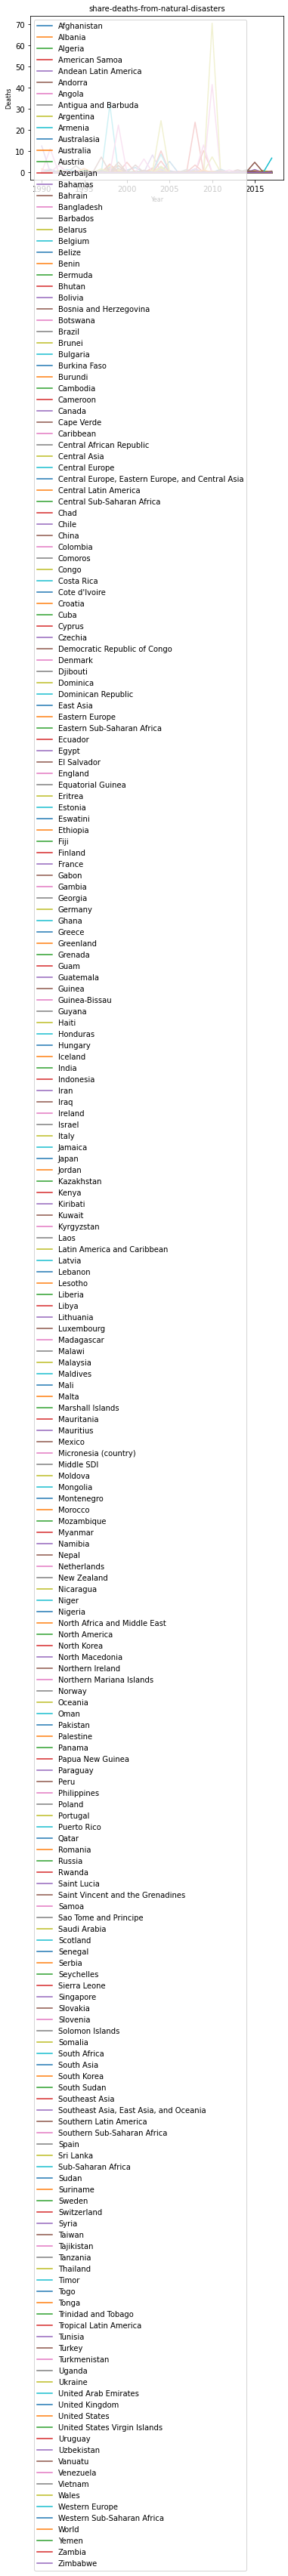

In [44]:
fig, ax = plt.subplots()

for key, grp in df2.groupby('Entity'):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Deaths', label=key)

plt.title('share-deaths-from-natural-disasters', fontsize=10)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Deaths', fontsize=8)
plt.legend(loc=2)

plt.show()

In [50]:
df2.iplot(kind='line',x= 'Entity', y= 'Deaths',
         title = "국가별 자연재해에 따른 인명피해 발생 비율(1990~2017)")

In [51]:
import plotly.express as px

fig = px.scatter(df2, x="Year", y= "Deaths",
                 color= "Entity", # Species 열의 값에 따라서 색깔 표현
                 size= "Deaths", # petal_length 에 따라 크기를 변화
                 title="국가별 자연재해에 따른 인명피해 발생 비율(1990~2017)")
#                  hover_data=['petal_width'], # 참고할 데이터 추가
                
fig.show()

In [56]:
df2.iplot(kind='bar', barmode='stack', x="Year", y= "Deaths",
          size= "Deaths", # petal_length 에 따라 크기를 변화
          title="국가별 자연재해에 따른 인명피해 발생 비율(1990~2017)")

In [47]:
deaths = df2.groupby('Entity').Deaths.mean()
deaths

Entity
Afghanistan                   0.203853
Albania                       0.007295
Algeria                       0.101882
American Samoa                0.457180
Andean Latin America          0.078026
                                ...   
Western Sub-Saharan Africa    0.004685
World                         0.100969
Yemen                         0.026388
Zambia                        0.001687
Zimbabwe                      0.007066
Name: Deaths, Length: 225, dtype: float64

In [48]:
# x축: 각 나라, y축: deaths 평균